<a href="https://colab.research.google.com/github/Haris-Ishfaq/codealpha_task_3/blob/main/yolov8_deepsort_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install ultralytics opencv-python deep_sort_realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [5]:
from ultralytics import YOLO
import cv2
from deep_sort_realtime.deepsort_tracker import DeepSort

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # You can use 'yolov8s.pt'

# Initialize Deep SORT tracker
tracker = DeepSort(max_age=30)

# Start webcam
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run object detection
    results = model(frame)[0]

    detections = []
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls_id = int(box.cls[0])
        detections.append(([x1, y1, x2 - x1, y2 - y1], conf, cls_id))

    # Pass detections to Deep SORT
    tracks = tracker.update_tracks(detections, frame=frame)

    # Draw tracking results
    for track in tracks:
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        l, t, w, h = map(int, track.to_ltrb())
        cv2.rectangle(frame, (l, t), (l + w, t + h), (0, 255, 0), 2)
        cv2.putText(frame, f'ID: {track_id}', (l, t - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

            # Show video
    cv2.imshow("Real-Time Detection & Tracking", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

100%|██████████| 6.25M/6.25M [00:00<00:00, 76.5MB/s]



0: 576x640 (no detections), 679.8ms
Speed: 41.2ms preprocess, 679.8ms inference, 8.9ms postprocess per image at shape (1, 3, 576, 640)


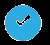

In [7]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO("yolov8n.pt")

# Read an image (replace with your own image path)
img = cv2.imread("/content/Screenshot_2025-05-04_114331-removebg-preview.png")

# Run detection
results = model(img)

# Visualize results
results[0].show()